In [ ]:
# Create

In [1]:
import sqlite3  

db_name = './database/my_books.db'

In [3]:
def create_table(db_name, db_sql):
    """
    데이터베이스 테이블을 생성하는 함수
    Args:
        db_name : Database Name
        db_sql  : Query for creating Table
    Returns : 
        is_success : Boolean 
    """
    is_success = True
    
    try :
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name)  

        # 커서 확보
        cur = conn.cursor()  

        # 테이블 생성
        cur.execute(db_sql)
    
    # except OperationalError as e:
    #     is_success = False
    #     print('Error:', e)
        
    except:
        is_success = False
        print("Database Error!")
        
    finally :        
        if is_success:
            # 데이터베이스 반영
            conn.commit()  
        else:
            # 데이터베이스 철회
            conn.rollback()
            
        # 데이터베이스 커넥션 닫기
        # print('Finish process of function.')
        conn.close()
    
    return is_success

In [4]:
import os
from os.path import exists

In [5]:
%pwd

'C:\\Users\\301-1\\Desktop\\data\\dummy'

In [11]:
dir_name = 'database'

if not exists(dir_name):
    os.mkdir(dir_name)
    print('[%s] 디렉터리를 생성했습니다.' %dir_name)
else:
    print('[%s]은(는) 이미 존재합니다.' %dir_name)

[database]은(는) 이미 존재합니다.


In [12]:
db_sql  = '''
CREATE TABLE my_books (
    title text,
    published_date text,
    publisher text,
    pages integer,
    recommendation integer
)
'''

if create_table(db_name, db_sql):
    print('테이블이 성공적으로 생성되었습니다.')
else :
    print('테이블이 생성되지 않았습니다')

테이블이 성공적으로 생성되었습니다.


In [9]:
%ls database

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8484-2321

 C:\Users\301-1\Desktop\data\dummy\database 디렉터리

2019-09-02  오전 09:44    <DIR>          .
2019-09-02  오전 09:44    <DIR>          ..
2019-09-02  오전 09:44             8,192 my_books.db
               1개 파일               8,192 바이트
               2개 디렉터리  20,497,530,880 바이트 남음


In [10]:
# # Database 파일 삭제
# db_name = './database/my_books.db'
# os.remove(db_name)

In [13]:
import sqlite3  

# 데이터 입력 함수
def insert_books(db_name):
    """
    데이터베이스 테이블에 데이터를 등록하는 함수
    Args:
        db_name : Database Name
    Returns : 
        is_success : Boolean 
    """
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 데이터 입력 SQL1
        db_sql = "INSERT INTO my_books VALUES ('메가트랜드', '2002.03.02','A', 200, 0)"
        cur.execute(db_sql)

        # 데이터 입력 SQL2 # 이런 식으로 하면 비효율적임
        db_sql = 'INSERT INTO my_books VALUES (?, ?, ?, ?, ?)'
        cur.execute(db_sql, ('인더스트리 4.0', '2016.07.09','B', 584, 1))

        # # 데이터 입력 SQL3 # 이 방법이 제일 좋아보임.
        books = [
            ('유니콘 스타트업', '2011.07.15','A', 248, 1),
            ('빅데이터 마케팅', '2012.08.25','A', 296, 1),
            ('사물인터넷 전망', '2013.08.22','B', 526, 0)
        ]
        cur.executemany(db_sql, books)
          
    except:
        is_success = False
        print("Database Error!")
        
        # 파이널리 한 이유?
    finally :      
        if is_success:
            # 데이터베이스 반영
            conn.commit()
        else:
            # 데이터베이스 철회(처음 시작할 때부터 다시)
            conn.rollback()
            
        # 데이터베이스 커넥션 닫기
        # print('Finish process of function.')
        conn.close()
    
    return is_success    

In [14]:
if insert_books(db_name):
    print('데이터가 성공적으로 등록되었습니다.')
else :
    print('데이터가 등록되지 않았습니다')

데이터가 성공적으로 등록되었습니다.


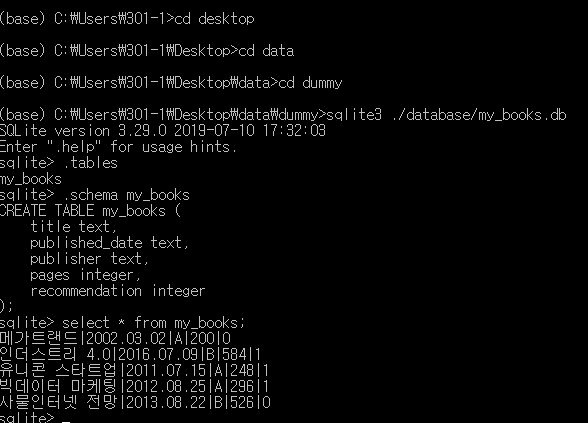

## 데이터 조회

In [15]:
import pandas as pd

def getBooksDF(books):
    ret_df = pd.DataFrame()
    
    title          = list()
    published_date = list()
    publisher      = list()
    pages          = list()
    recommendation = list()

    column_name = ['title', 'published_date', 'publisher', 'pages', 'recommendation']
    for book in books:
        # print(book)
        # for value in book:
        #     print(value, end=" | ")
        title         .append(book[0])
        published_date.append(book[1])
        publisher     .append(book[2])
        pages         .append(book[3])
        recommendation.append(book[4])

    data = {
        'title'          : title         ,
        'published_date' : published_date,
        'publisher'      : publisher     ,
        'pages'          : pages         ,
        'recommendation' : recommendation
    }

    ret_df = pd.DataFrame(data, columns=column_name)
    
    return ret_df

In [16]:
import sqlite3
import pandas as pd

def select_all_books(db_name):
    """
    전체 데이터를 조회하는 함수
    Args:
        db_name : Database Name
    Returns :
        is_success : Boolean 
        ret_df : DataFrame of books
    """
    ret_df = pd.DataFrame()
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 조회용 SQL 실행
        db_sql = "SELECT * FROM my_books"
        cur.execute(db_sql) 

        # 조회한 데이터 불러오기
        print('[1] 전체 데이터 출력하기')
        books = cur.fetchall()                          

        ret_df = getBooksDF(books)
        
        # 데이터 출력하기
        # for book in books:                              
        #     print(book)
     
    except:
        is_success = False
        print("Database Error!")
        
    finally : 
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success, ret_df

In [17]:
is_success, books_df = select_all_books(db_name)
if is_success:
    print('조회된 데이터는 총 %d 건 입니다.'%len(books_df))
else :
    print('데이터를 조회하지 못했습니다')

books_df

[1] 전체 데이터 출력하기
조회된 데이터는 총 5 건 입니다.


,title,published_date,publisher,pages,recommendation
0,메가트랜드,2002.03.02,A,200,0
1,인더스트리 4.0,2016.07.09,B,584,1
2,유니콘 스타트업,2011.07.15,A,248,1
3,빅데이터 마케팅,2012.08.25,A,296,1
4,사물인터넷 전망,2013.08.22,B,526,0


In [19]:
# 일부 조회용 함수
def select_some_books(db_name, number):
    """
    일부 데이터를 조회하는 함수
    Args:
        db_name : Database Name
        number  : Count of data to query
    Returns : 
        is_success : Boolean 
        ret_df : DataFrame of books
    """
    ret_df = pd.DataFrame()
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 조회용 SQL 실행
        db_sql = "SELECT * FROM my_books"
        cur.execute(db_sql) 

        # 조회한 데이터 일부 불러오기
        print('[2] 데이터 일부 출력하기')
        books = cur.fetchmany(number)                   

        ret_df = getBooksDF(books)
     
    except:
        is_success = False
        print("Database Error!")
        
    finally : 
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success, ret_df

In [20]:
# select_some_books(db_name, number=3)

is_success, books_df = select_some_books(db_name, number=3)
if is_success:
    print('조회된 데이터는 총 %d 건 입니다.'%len(books_df))
else :
    print('데이터를 조회하지 못했습니다')

books_df

[2] 데이터 일부 출력하기
조회된 데이터는 총 3 건 입니다.


,title,published_date,publisher,pages,recommendation
0,메가트랜드,2002.03.02,A,200,0
1,인더스트리 4.0,2016.07.09,B,584,1
2,유니콘 스타트업,2011.07.15,A,248,1


In [22]:
# 1개 조회용 함수
def select_one_book(db_name):
    """
    최상단 하나의 데이터를 조회하는 함수
    Args:
        db_name : Database Name
    Returns : 
        is_success : Boolean 
        ret_df : DataFrame of books
    """
    ret_df = pd.DataFrame()
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 조회용 SQL 실행
        db_sql = "SELECT * FROM my_books "
        cur.execute(db_sql) 

        # 데이터 한개 출력하기
        print('[3] 1개 데이터 출력하기')
        # print(cur.fetchone())                          
        book = cur.fetchone()
        books = [book]
        ret_df = getBooksDF(books)
     
    except:
        is_success = False
        print("Database Error!")
        
    finally : 
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success, ret_df        

In [24]:
# select_one_book(db_name) 

is_success, books_df = select_one_book(db_name) 
if is_success:
    print('하나의 데이터를 성공적으로 조회하였습니다.')
else :
    print('데이터를 조회하지 못했습니다')

books_df

[3] 1개 데이터 출력하기
하나의 데이터를 성공적으로 조회하였습니다.


,title,published_date,publisher,pages,recommendation
0,메가트랜드,2002.03.02,A,200,0


In [80]:
# 쪽수 많은 책 조회용 함수
def find_big_books(db_name):
    """
    조건에 맞는 데이터를 조회하는 함수
    조건 : 페이지수가 300쪽보다 큰 데이터
    Args:
        db_name : Database Name
    Returns : 
        is_success : Boolean 
        ret_df : DataFrame of books
    """
    ret_df = pd.DataFrame()
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 조회용 SQL 실행
        # db_sql = "SELECT title, pages FROM my_books "
        db_sql = "SELECT * FROM my_books "
        db_sql+= "WHERE pages > 300"
        cur.execute(db_sql) 

        # 조회한 데이터 불러오기
        print('[4] 페이지 많은 책 출력하기')
        books = cur.fetchall()
        
        ret_df = getBooksDF(books)

    except:
        is_success = False
        print("Database Error!")
        
    finally : 
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success, ret_df            

In [81]:
# find_big_books(db_name)

is_success, books_df = find_big_books(db_name)
if is_success:
    print('조건에 맞는 데이터는 총 %d 건 입니다.(조건:pages>300)'%len(books_df))
else :
    print('데이터를 조회하지 못했습니다')

books_df

[4] 페이지 많은 책 출력하기
조건에 맞는 데이터는 총 2 건 입니다.(조건:pages>300)


,title,published_date,publisher,pages,recommendation
0,인더스트리 4.0,2016.07.09,B,584,1
1,사물인터넷 전망,2013.08.22,B,526,0


In [166]:
import sqlite3
import pandas as pd

def find_books_by_title(db_name, title):
    """
    이름으로 데이터를 조회하는 함수
    Args:
        db_name : Database Name
    Returns :
        is_success : Boolean 
        ret_df : DataFrame of books
    """
    ret_df = pd.DataFrame()
    is_success = True
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 조회용 SQL 실행
        db_sql = "SELECT * FROM my_books " #<- 한 칸 띄어주는 게 중요함
        db_sql += "WHERE title like '{}%'"        
        cur.execute(db_sql.format(title))
        print(title)
        
        # 조회한 데이터 불러오기
        print('[1] 선택한 데이터 데이터 출력하기')
        books = cur.fetchall()                                  
        ret_df = getBooksDF(books)
        
        # 데이터 출력하기
        # for book in books:                              
        #     print(book)
     
    except:
        is_success = False
        print("Database Error!")
        
    finally : 
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success, ret_df

In [167]:
# find_books_by_title(db_name)

is_success, books_df = find_books_by_title(db_name, "빅데이터")
if is_success:
    print('조건에 맞는 데이터는 총 %d 건 입니다.'%len(books_df))
else :
    print('데이터를 조회하지 못했습니다')

books_df

빅데이터
[1] 선택한 데이터 데이터 출력하기
조건에 맞는 데이터는 총 1 건 입니다.


,title,published_date,publisher,pages,recommendation
0,빅데이터 마케팅,2012.08.25,A,296,1


In [173]:
## data renewal

def updata_books(db_name):
    """
    데이터를 수정하는 함수
    Args:
        db_name : Database Name
    Returns:
        is_success : Boolean
    """
    is_success = True
    
    try:
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name)
        
        # 커서 확보
        cur = conn.cursor()
        
        # 데이터 수정 SQL (제목이 ?인 책의 추천 유무를 ?로 변경하라)
        db_sql = "UPDATE my_books SET recommendation = ? WHERE title = ?"
        
        # 수정 SQL 실행
        cur.exectute(db_sql, (1, '메가트랜드'))
        
    except:
        is_success = False # 실행이 안 되면 False로 바꿈
        print("Database Error!")
        
    finally:
        if is_success:
            # 데이터베이스 반영
            conn.commit()
            
        else:
            # 데이터베이스 철회
            conn.rollback()
            
        # 데이터베이스 커넥션 닫기
        conn.close()
        
    return is_success

In [174]:
# select_one_book(db_name)
# update_books(db_name)
# print('[데이터 수정 완료] ================== ')
# select_one_book(db_name)


is_success, books_df1 = select_one_book(db_name) 

if updata_books(db_name):
    print('데이터가 성공적으로 수정되었습니다.')
else :
    print('데이터가 수정되지 않았습니다')
    
is_success, books_df2 = select_one_book(db_name) 

books_df = pd.concat([books_df1, books_df2], axis=0)
books_df['update'] = ['수정전', '수정후']
books_df.set_index('update', inplace=True)
books_df

[3] 1개 데이터 출력하기
Database Error!
데이터가 수정되지 않았습니다
[3] 1개 데이터 출력하기


,title,published_date,publisher,pages,recommendation
update,,,,,
수정전,메가트랜드,2002.03.02,A,200,0
수정후,메가트랜드,2002.03.02,A,200,0


## Data delete

In [186]:
import sqlite3 

# 데이터 삭제용 함수
def delete_books_by_title(db_name, title):
    """
    책제목에 해당하는 데이터를 삭제하는 함수
    Args:
        db_name : Database Name
        title   : Title of the book to be removed
    Returns : 
        is_success : Boolean 
    """
    is_success = True
    
    try:    
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  

        # 데이터 삭제 SQL
        db_sql = "DELETE FROM my_books " # my_books 안의
        db_sql+= "WHERE title = ?      " # title ?을 지울 거임

        # 수정 SQL 실행
        # print('db_sql:', db_sql)
        # print('title:', title)
        cur.execute(db_sql, (title,)) # 위 ?에 title을 넣어줌
        print(db_sql)
        print(title)
        # count = cur.execute(db_sql, (title,))
        # print('count:', type(count), count)
        
    except:
        is_success = False
        print("Database Error!")
        
    finally :      
        if is_success:
            # 데이터베이스 반영
            conn.commit()  
        else:
            # 데이터베이스 철회
            conn.rollback()
            
        # 데이터베이스 커넥션 닫기
        conn.close()
    
    return is_success   

In [187]:
title = '메가트랜드'
if delete_books_by_title(db_name, title):
    print('데이터가 성공적으로 삭제되었습니다.')
else :
    print('데이터가 삭제되지 않았습니다')

is_success, books_df = select_all_books(db_name) 
books_df

DELETE FROM my_books WHERE title = ?      
메가트랜드
데이터가 성공적으로 삭제되었습니다.
[1] 전체 데이터 출력하기


,title,published_date,publisher,pages,recommendation
0,인더스트리 4.0,2016.07.09,B,584,1
1,유니콘 스타트업,2011.07.15,A,248,1
2,빅데이터 마케팅,2012.08.25,A,296,1
3,사물인터넷 전망,2013.08.22,B,526,0


In [188]:
def delete_books(db_name, col_name, col_val):
    """
    조건에 맞는 데이터를 삭제하는 함수
    Args:
        db_name  : Database Name
        col_name : Column Name
        col_val  : Column Value
    Returns : 
        is_success : Boolean 
    """
    is_success = True
    
    try: 
        # 데이터베이스 커넥션 생성
        conn = sqlite3.connect(db_name) 

        # 커서 확보
        cur = conn.cursor()  


        # 데이터 삭제 SQL
        # db_sql = "DELETE FROM my_books "
        # db_sql+= "WHERE {} = '{}' "
        # db_sql = db_sql.format(col_name, col_val)
        # cur.execute(db_sql)    

        # # 데이터 삭제 SQL
        db_sql = 'DELETE FROM my_books '
        db_sql+= 'WHERE {} = ? '
        db_sql = db_sql.format(col_name)

        # 수정 SQL 실행
        cur.execute(db_sql, (col_val,))

    except:
        is_success = False
        print("Database Error!")
        
    finally :      
        if is_success:
            # 데이터베이스 반영
            conn.commit()  
        else:
            # 데이터베이스 철회
            conn.rollback()
            
        # 데이터베이스 커넥션 닫기
        conn.close()
    
    return is_success   

In [193]:
is_success, books_df = select_all_books(db_name) 
books_df

[1] 전체 데이터 출력하기
True


In [ ]:
print(is_success)

In [190]:
col_name = 'publisher'
col_val  = 'A'
if delete_books(db_name, col_name, col_val):
    print('데이터가 성공적으로 삭제되었습니다.')
else :
    print('데이터가 삭제되지 않았습니다')

is_success, books_df = select_all_books(db_name) 
books_df

데이터가 성공적으로 삭제되었습니다.
[1] 전체 데이터 출력하기


,title,published_date,publisher,pages,recommendation
0,인더스트리 4.0,2016.07.09,B,584,1
1,사물인터넷 전망,2013.08.22,B,526,0


In [191]:
col_name = 'title'
col_val  = '사물인터넷 전망'
if delete_books(db_name, col_name, col_val):
    print('데이터가 성공적으로 삭제되었습니다.')
else :
    print('데이터가 삭제되지 않았습니다')

is_success, books_df = select_all_books(db_name) 
books_df

데이터가 성공적으로 삭제되었습니다.
[1] 전체 데이터 출력하기


,title,published_date,publisher,pages,recommendation
0,인더스트리 4.0,2016.07.09,B,584,1
